<a href="https://colab.research.google.com/github/Maucho6340/2145-data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [10]:
#Leyendo los datos
import pandas as pd
datos = pd.read_csv('/content/precios_casas.csv')
datos.head(2)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [11]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


El dato Id no lo vamos a utilizar, por lo que lo eliminamos

In [12]:
print(datos.columns.tolist())


['Id', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso', 'cantidad_banos', 'capacidad_carros_garage', 'calidad_de_cocina_excelente', 'precio_de_venta']


In [13]:
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

Vamos a estimar el precio de la casa con respecto a los atributos que están incluido en el df.<br>
En tonces vamos a tener que entender que factores están relacionados con el precios de la casa y para ello utilizaremos el método de la correlación de Pearson.

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.(Inversamente proporcional)  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.(Directamente proporcional)<br>

La intensidad es lo que varía y que deterima la magnitud de esa correlación. Tendremos entonces correlaciones, muy leves, moderada, fuertes y muy fuertes.<br>
Cuando la correlación tiene a cero, quiere decir que no existe correlación.




In [14]:
# Correlación
corr=datos.corr()


In [15]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


Aquí tenemos varias correlaciones, todas positivas y que influyen sobre el precio de venta.<br>
- Área del primer piso: Tiene una correlación positiva de 0.61.<br>
- Si tienen segundo piso: Tiene una correlación positiva leve.<br>
- Área del segundo piso: Tiene una correlación positiva moderada.<br>
- Cantidad de baños: Tiene correlación positivo y algo signifacnte.<br>
- capacidad del garage: Tiene correlación positiva y de consideración.<br>
- Calidad de la cocina: También tiene  correlación positiva e importante.<br>
Y el precio de venta tienen una correlación perfecta consigo mismo, pues ese es el valor de correlación.

####Actividad

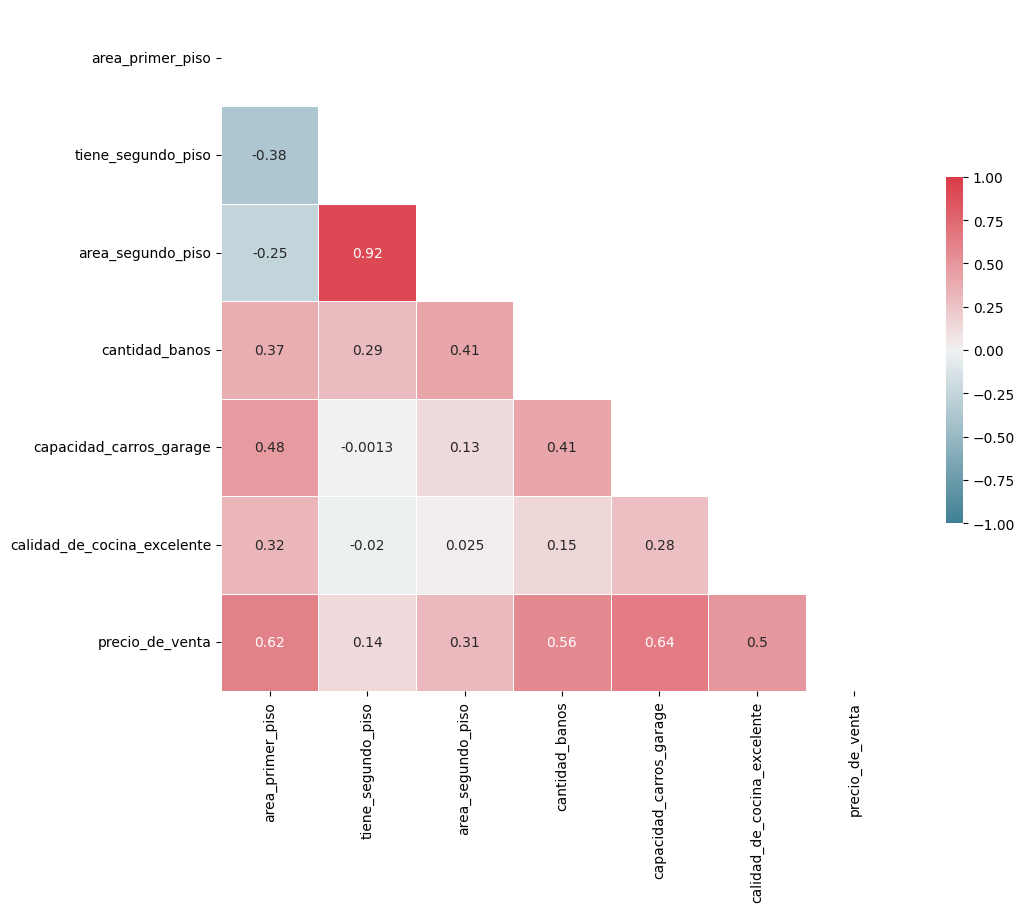

In [16]:
# Actividad
# Cuáles factores están más correlacionados?
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv('/content/precios_casas.csv')
datos = datos.drop(columns = "Id")

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Enumeramos algunos coeficientes para analizar:

- La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.
- Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.
- Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa. Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.<br>

<u>Observación</u>: Es importante notar que la correlación no implica causalidad; es decir, no podemos afirmar que el aumento en el precio de venta es causado específicamente por el aumento en el área del primer piso solo con el uso de la correlación, sino que estos factores están relacionados entre sí.

## Relacionando variables

In [17]:
# Importanmos la tres bibliotecas que vamos a estar utilizando para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

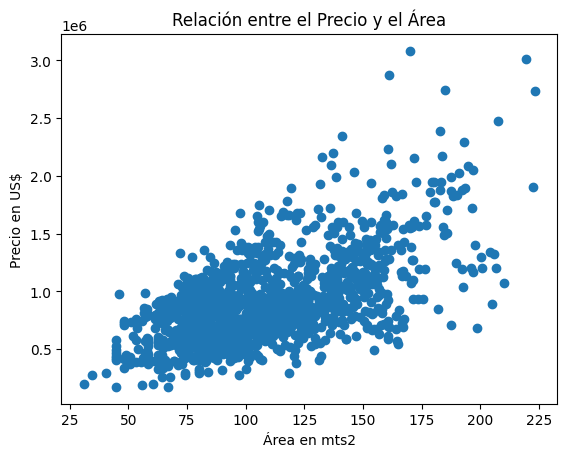

In [18]:
# Cómo se relacionan el área construída y el precio del inmueble?
# Vamos a usar un gráfico de dispersión
plt.scatter(x=datos['area_primer_piso'], y=datos['precio_de_venta'])
plt.title('Relación entre el Precio y el Área')
plt.xlabel('Área en mts2')
plt.ylabel('Precio en US$')
plt.show()


Nota que si tenemos una casa de 200 m2 el valor será de 2 millones y una casa de 125 m2 costará entre 1,5 millones y 500,000.00. Con este gráfico puedo tratar de trazar manualmente una recta que permita describir este comportamiento.


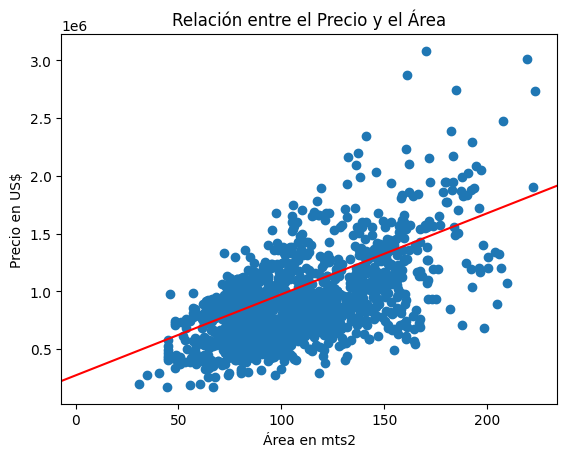

In [19]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(x=datos['area_primer_piso'], y=datos['precio_de_venta'])
plt.axline(xy1=(4,300000), xy2=(175,1500000), color='red')# Estos valores se obtuvieron a ojo en el gráfico
plt.title('Relación entre el Precio y el Área')
plt.xlabel('Área en mts2')
plt.ylabel('Precio en US$')
plt.show()

## Mejor recta

Utilizaremos el método de los mínimos cuadrados ordinarios (OLS:Ordinary List Squares)<br>
Hallar la distancia mínima con respecto a los residuos mínimos

In [20]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')



# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

NP: ¿Cómo el área de la casa, me ayuda a definir el precio de la casa?

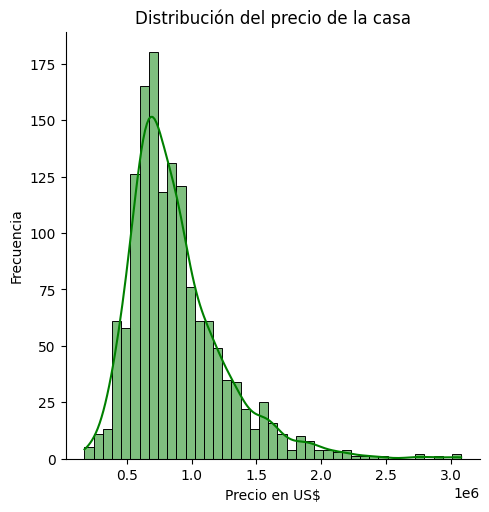

In [21]:
#Quién es nuestra variable de respuesta?
#Creamos un histograma para ver donde están los datos mas concentrados
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de la casa')
plt.xlabel('Precio en US$')
plt.ylabel('Frecuencia')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [22]:
# import train_test_split permite tomar la base y hacer una reparatición entre una base de entrenamiento y una base de prueba como tal.
from sklearn.model_selection import train_test_split

# Almacenamos en "y" el precio de venta
y=datos['precio_de_venta']
# Almacenamos en "X"", todo menos el precio de venta (drop). "X" mayúscula, por que son todos atributos de X
X=datos.drop(columns='precio_de_venta')

# Separamos grupos para entrenamiento y prueba. Con random_state garantizamos la reproductibilidad de la segregación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [23]:
#Datos de entrenamiento para usar la fórmula
# Creamos DF de prueba
df_train = pd.DataFrame(X_train)
df_train.head()
df_train['precio_de_venta'] = y_train
# Con esto creamos un DF de entrenamiento que tienen todas mis variables(X_train) y mi variable dependiente (y_train) en un solo DF

In [24]:
# import ols
from statsmodels.formula.api import ols

In [25]:
# ajustando el primer modelo a los datos de entrenamiento considerando el precio de venta y el área del 1er piso
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [26]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


El resultado entrega el parámetro del área del 1er piso y el valor de interceptación, ambos en unidades dólares.

In [27]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        02:38:33   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

La técnica OLS me ayuda a deconsiderar los valores atípicos o outlayers

In [28]:
# El resumen del modelo


- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


##**Y = β₀ + β₁x + e**

Variable Respuesta (Y): También llamada variable dependiente, es aquella que estamos tratando de predecir.

Intercepto (β₀): El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.

Variable Explicativa (X): También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.

Coeficientes de Regresión (β₁): Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.

Error Residual (e): Diferencia entre los valores reales y previstos de la variable respuesta.


**Coeficientes**<br>

La relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

El ajuste de la línea de regresión lineal se simplifica mediante el método de los mínimos cuadrados. Este método tiene como objetivo encontrar la línea que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los valores previstos por la línea y calculando los coeficientes del modelo.

## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [29]:
# observando el R²
round(modelo_0.rsquared,2)

np.float64(0.38)

R²=1 ajuste perfecto; R²=0 no hay correlación.<br>

Este coeficiente indica que el área del primer piso de la casa, explica el 37% del valor de la casa.<br>
Entonces, vamos a estar trayendo otras variabeles para que ver hasta que punto nuestro modelo puede llegar a explicar mejor la variación de esta variable dependiente que es el precio de la casa.<br>

Ahora entenderemos el concepto de los reiduos.

## Entendiendo el resíduo

Resta un 62% del precio del inmueble que no está siendo explicado por el área del primer piso. Aquí aparecen los reiduos.

In [30]:
# Quiénes son los residuos?
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


Para la casa 1303 el residuo es -193.023 dólares.<br>
Para la casa768 es de -37.57 dólares. <br>
La idea ess que este residuo sea lo mas cercano a cero.<br>

<b><font color='red'>Es muy importante que veamos cómo está la distribución de residuos, para ver hasta qué punto nuestro modelo verdaderamente se está ajustando bien.</font></b>


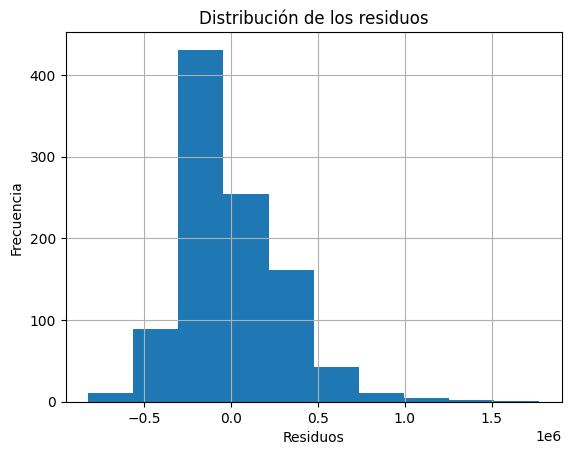

In [31]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

La variación está entre -0.5 y 0.5 x10^6, lo que implica que hay muchos residuos megativos. Tenemos cerca de 430 inmuebles en que el residuo está entre 300.000 a 100.000 dólares.<br>

El gráfico ideal sería una recta sobre el 0.0 y con una variación mínima hacia lado y lado.

**Mi modelo, utilizando únicamente, el área del primer piso, como atributo para estimar el precio de venta, no es lo suficientemente explicativo y presenta un márgen de error de -100.000 a -200.000 dólares en la gran mayoría de inmuebles.**<br>
Según el gráfico solo tenemos270 inmuebles que presentan una ditribución en un rango mas o menos aceptable.<br>

<font color='blue'>*Por ello es importante comprender que mientras menor sea el residuo, mejor va a ser la generalización de nuestro modelo*

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

Hasta aquí todo lo que hicimos fue con el conjunto de entrenamiento y no con la muestra.
- Estrenamos el modelo.
- Analizamos la explicabilidad del modelo.
- Analizamos cada uno de los coeficientes (de determinación, residuos).

Es hora de poner a prueba nuestro modelo, con datos que nunca vió, a través de la base de prueba.

## Obteniendo el R² de la previsión

In [32]:
# definiendo la 'Y' prevista
y_predict=modelo_0.predict(X_test)

In [33]:
# importando el r2_score
from sklearn.metrics import r2_score

print(f'El coeficiente de determinación R², para el modelo, es de: {round(r2_score(y_test, y_predict),2)}')

El coeficiente de determinación R², para el modelo, es de: 0.39


El resultado es muy parecido al valor anterior de 0.38, lo que significa que nuestro modelo, que fue generado exclusivamente con las áreas del primer piso como parámetro para preveer el precio del inmueble, está generalizando relativamente bien para este caso.

Pero eso no quiere decir que estemos explicando bien la variación del precio unicamente con este parámetro, pues hay alrededor de un 61% aún sin explicar.<br>

Lo que queremos es destacar la importancia de concocer todos estos conceptos para entender cuál es el mejor modelo y mejor recta para nuestro modelado.


In [34]:
# mostrando el resultado de R²


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

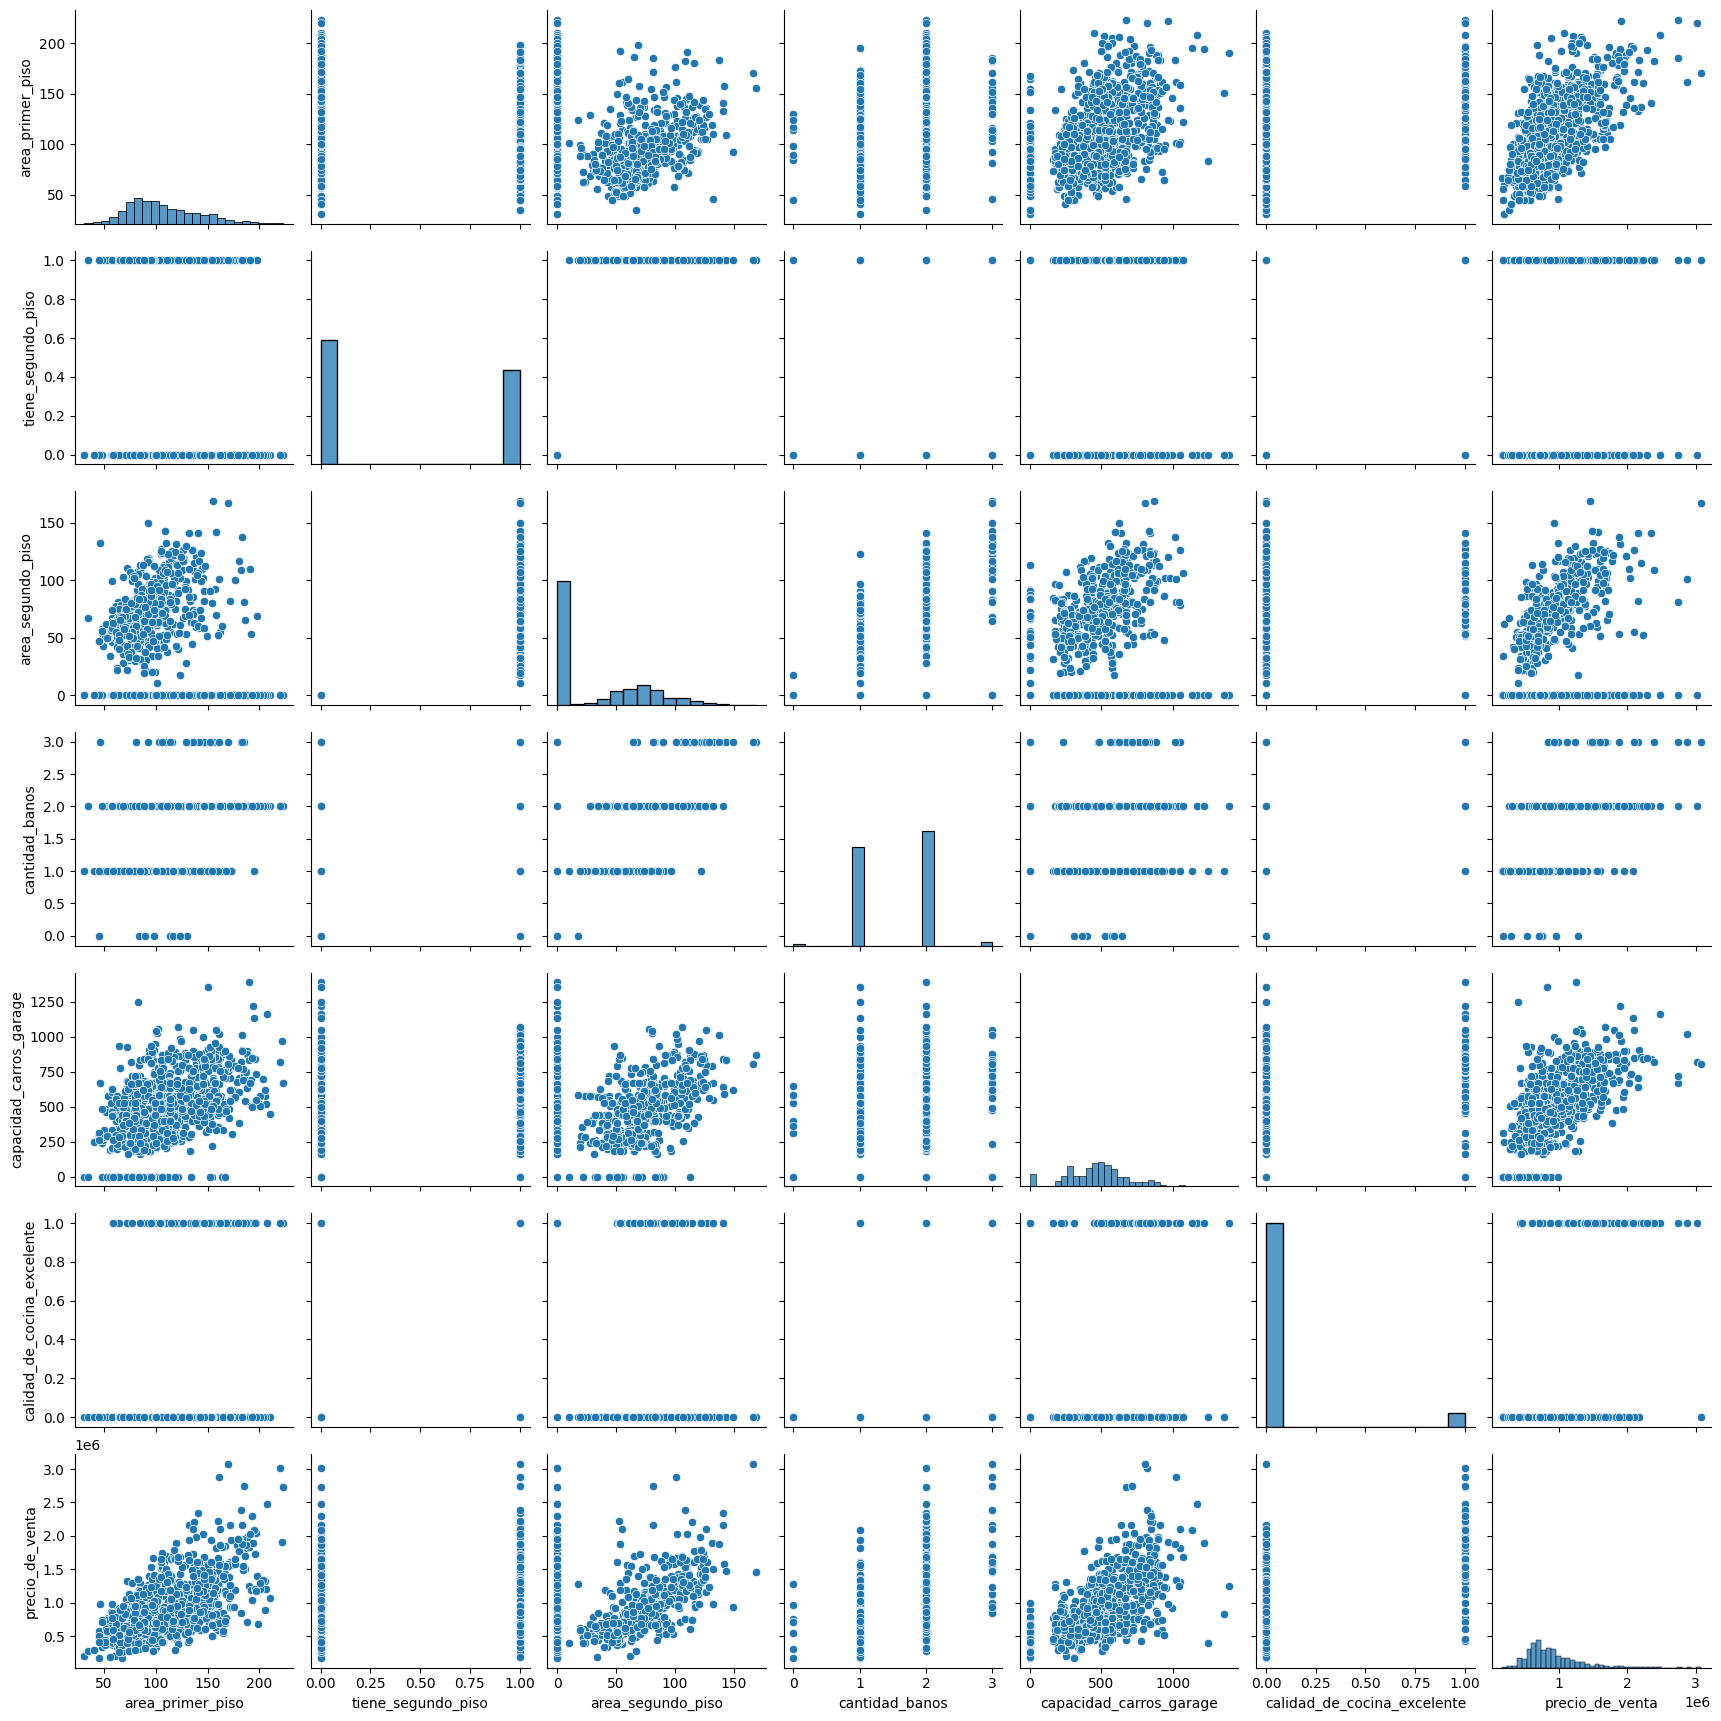

In [35]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)
plt.show()


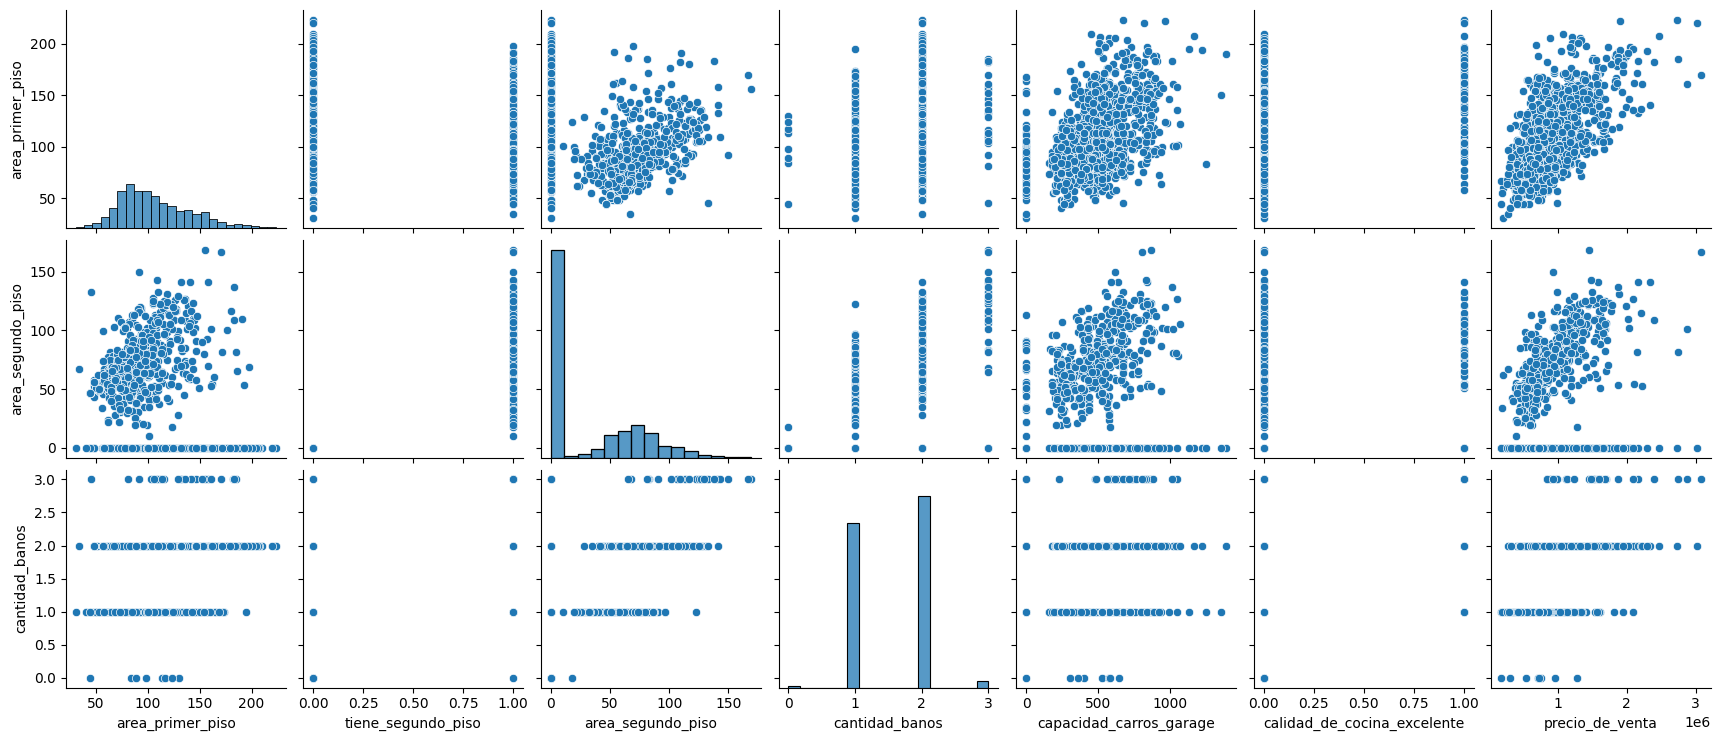

In [36]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['area_primer_piso', 'area_segundo_piso', 'cantidad_banos'])
plt.show()

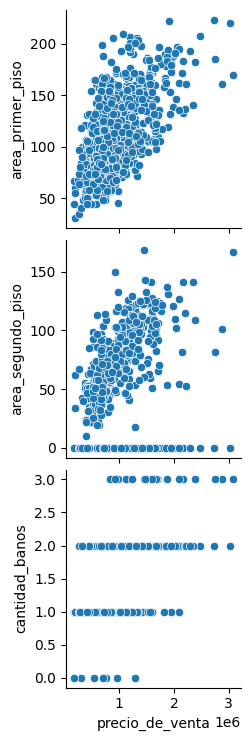

In [37]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['area_primer_piso', 'area_segundo_piso', 'cantidad_banos'], x_vars=['precio_de_venta'])
plt.show()

## Añadiendo factores al modelo

In [64]:
# importando la api de statsmodels
import statsmodels.api as smf

In [65]:
# Añadiendo una constante para permitir estimar mejor el valor de intersección en el eje "y"
X_train = smf.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [63]:
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [41]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = smf.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                                     'cantidad_banos', 'capacidad_carros_garage',
                                     'calidad_de_cocina_excelente']]).fit()

In [42]:
# Modelo sin el área del segundo piso
modelo_2 = smf.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                     'cantidad_banos', 'capacidad_carros_garage',
                                     'calidad_de_cocina_excelente']]).fit()

In [61]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = smf.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                     'cantidad_banos','calidad_de_cocina_excelente']]).fit()

In [62]:
# Resumen del modelos
modelos=[modelo_0, modelo_1, modelo_2, modelo_3]
for i,j in enumerate(modelos):
    print(f'*************************************************************************************\n********************** El Modelo {i} tienen el siguiente resumen **********************\n*************************************************************************************')
    print(j.summary(), '\n\n')

*************************************************************************************
********************** El Modelo 0 tienen el siguiente resumen **********************
*************************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        02:49:19   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            non

<font color='blue'>NP:*ANÁLISIS DE LOS VALORES ANTERIORES*<br>

- El modelo 1 tienen un R² mas alto. El área de 1er piso tiene efecto positivo  en el precio de la casa, pero si tiene 2do piso es negativo, sin embargo el área del 2do piso tiene efecto positivo. <font color='red'>Esto es contradictorio pues un mismo concepto tiene efecto positivo y negativo a la vez.<br>

- El Modelo 2, al observar el mismo atributo, del 2do piso, tiene efecto positivo en los dos aspectos (si tiene y su área).

Al revisar las notas bajo el resumen del Modelo 01, encontramos: *The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.* Hay una fuerte colinearidad. Que indica, que cuando estoy analizando el coeficiente de determinación, la idea es observar efectos aislados de cada uno de los atributos en la variación de la variable dependiente o la variable de respuesta que es el precio de la casa; cuando tengo multicolinearidad quiere decir que no estoy pudiendo aislar bien el efecto de cada uno de esos atributos y ellos acaban sobreponinéndose y no me permiten explicar, por ejemplo que el área del 2do piso nos ayuda a entender un 5% o un 10% adicional en la variacion del precio de la casa y que la cantidad de baños nos ayuda a entender un 8% adicional, No, por que se estan sobreponiendo, este efecto muticolinearidad hace que nuestro modelo de regresión lineal se vea comprometido, por ello es importante que treatemos siempre de utilizar variables que tengan efectos aislados, no como en en el caso del 2do piso, que está asociado tanto a tenerlo como a su su área. sería mejor escoger algunas de ellas y no las dos, dejando solo la pregunta de is tiene o no.<br>

Al revisar los modelos, vemos que el 01 y 02 tienen multicolinearidad fuerte, de esta manera empiezo a entender que no son los mejores modelos. En cambio el 03 tienen todos los efectos son positivos y no tiene multicolinearidad.



#####<font color='blue'>Refinando la selección de modelos<br>

En la clase sobre comparación de modelos de regresión lineal, exploramos cómo evaluar y seleccionar el modelo más adecuado utilizando el R² y otros criterios. Además de la selección manual que discutimos, existen métodos automáticos de selección de variables que pueden ser extremadamente útiles en situaciones donde el número de variables explicativas es grande. Estos métodos, como stepwise, backward y forward selection, siguen criterios predefinidos para agregar o eliminar variables del modelo de forma iterativa. Explora a continuación los métodos automáticos de selección de variables, que buscan equilibrar la complejidad del modelo y su capacidad explicativa.

- El método de forward selection comienza con un modelo sin variables explicativas y agrega una a una, eligiendo en cada paso la variable que más mejora el modelo de acuerdo con un criterio estadístico específico, como el menor valor de p-valor o el mayor aumento en el R² ajustado.
- El backward selection inicia con todas las variables posibles en el modelo y, de manera iterativa, elimina la variable que menos contribuye al modelo, nuevamente basándose en criterios como el p-valor o el impacto en el R² ajustado.
- El stepwise selection es una combinación de los dos métodos anteriores, donde las variables pueden ser agregadas o eliminadas en cada paso, dependiendo de su contribución a la mejora del modelo.<br>

Estos métodos de selección automática son herramientas poderosas que ayudan en la identificación del modelo más parsimonioso, es decir, aquel que puede explicar los datos de manera eficiente sin ser excesivamente complejo. Sin embargo, es crucial que el científico de datos comprenda y supervise el proceso, ya que la elección automática puede, a veces, introducir sesgo o sobreajuste, especialmente si el criterio de selección no es bien elegido o si el modelo no es validado adecuadamente con datos nuevos o de prueba.


Para obtener solo el valor del Coeficiente de determinación R²

In [66]:
for i,j in enumerate(modelos):
    print(f'El Coeficiente de determinación R² del Modelo {i}: {j.rsquared.round(2)}')

El Coeficiente de determinación R² del Modelo 0: 0.38
El Coeficiente de determinación R² del Modelo 1: 0.16
El Coeficiente de determinación R² del Modelo 2: 0.65
El Coeficiente de determinación R² del Modelo 3: 0.65


## Comparando los modelos
Cuál es el modelo?


Como ya vimos que el modelo 3 era el mas adecuado, trabajaremos en él.

In [60]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,192.844250
Estrelas,50.874974
ProximidadeTurismo,-20.046232
Capacidade,81.026781


#####**<font color='blue'>Manos a la obra: análisis y selección de modelos de regresión lineal**



Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

1. análisis inicial con el PairPlot de Seaborn;
1. construir modelos de regresión lineal; y
1. realizar la comparación de estos modelos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [47]:
import pandas as pd

df = pd.read_csv('hoteis.csv')

df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


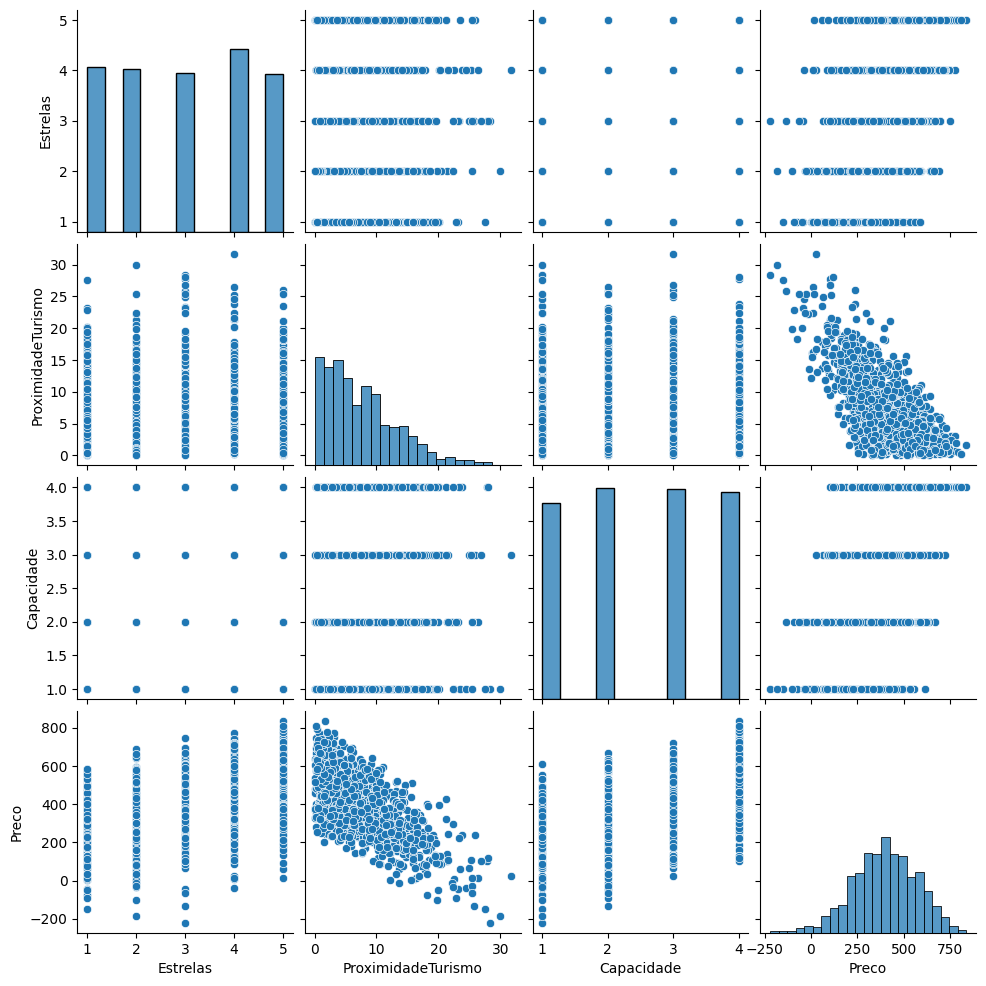

In [48]:
# Passo 1: Análise com o PairPlot
import seaborn as sns
sns.pairplot(df)

In [56]:
#Passo 2: Construção dos Modelos de Regressão Linear
import statsmodels.api as sm


# Modelo 1: Utilizando apenas 'Estrelas'
X1 = df[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = df['Preco']
modelo_1A = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = df[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2A = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3A = sm.OLS(y, X3).fit()

In [57]:
# Passo 3: Comparação dos Modelos

print("Modelo 1A - Apenas 'Estrelas':")
print(modelo_1A.summary())
print("\nModelo 2A - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2A.summary())
print("\nModelo 3A - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3A.summary())

Modelo 1A - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           6.09e-40
Time:                        02:48:02   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [67]:
# Añadiendo una constante en X_test
X_test = smf.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [68]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(X_test[['const',	'area_primer_piso',	'tiene_segundo_piso',	'cantidad_banos',	'calidad_de_cocina_excelente']])
prevision_3

,0
997,6.000797e+05
805,8.430755e+05
1138,8.872654e+05
1391,1.216436e+06
516,8.878339e+05
...,...
1051,5.267412e+05
484,7.850017e+05
1357,5.149567e+05
844,7.588500e+05


In [69]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R² de la base de previsión es: {modelo_3.rsquared.round(2)}')

El coeficiente R² de la base de previsión es: 0.65


Comparado con los datos del entrenamiento

In [70]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R² con respecto a la base de entrenamiento es: {round(r2_score(y_test, prevision_3),2)}')

El coeficiente R² con respecto a la base de entrenamiento es: 0.64


Quedó un coeficiente del 64%. La idea aquí es observar qee si nuestra previsión está bastante cercana a la manera con que lo hizo con los datos de entrenamiento, al momento de comprarlo con los datos de prueba, quiere decir que nuestro modelo está generalizando bien con datos que no ha visto. Entonces podemos avanzar y precificar una casa nueva a nuestro modelo, y vamos a ver el valor que le va a asignar según las característica de la misma.

## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

Ya sabemos que nuestro modelo_3 está generalizando bien por que cuando lo probamos con los datos de prueba notamos que el valor del coeficiente de determinación R², es bastante aproximado, pues con la base de entrenamiento nos dió 64% y con la base de prueba 64%, que da un margen del 1% con datos que nunca había visto. Ahora llegó el momento de ponerlo a prueba con una casa nueva cuyo valor no sabemos y tiene las características de 2 baños, cocina mediana, primer piso de 120 m² y tiene segundo piso.

In [71]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({'const':[1],
                               'area_primer_piso': [120],
                               'tiene_segundo_piso': [1],
                               'cantidad_banos': [2],
                               'calidad_de_cocina_excelente': [0]
})
nuevo_inmueble

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,120,1,2,0


In [72]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


La casa va a costar 968 mil dólares, pero debemos recordar que el modelo_0 inicamente explica el valor del 37% de la casa, por lo que nos es tan preciso.

In [73]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


El modelo_3 nos dió un valor de 1.123.758 dólares.

In [74]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [75]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('nuevas_casas.csv', sep =';')
nuevas_casas.head(2)

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1


Ahora vamos a eliminar el número de la casa.

In [76]:
nuevas_casas.drop(columns='Casa', inplace=True)
nuevas_casas.head(2)

,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,150,1,2,1
1,180,0,3,1


In [77]:
# Añadiendo una constante
nuevas_casas=smf.add_constant(nuevas_casas)
nuevas_casas.head(2)

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1


In [78]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
nuevas_casas['Precio de venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


##### **<font color='blue'>Manos a la obra: estimando el valor de una casa**


Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

- 1 baño
- Área 98m²
- No tiene segundo piso
- Calidad de la cocina excelente<br>

Tu tarea es utilizar el modelo de regresión entrenado durante el curso para obtener el precio de la casa con estas características. Por lo tanto, crea un DataFrame con esta información y haz la predicción del valor del inmueble.

In [79]:
nuevo_inmueble = pd.DataFrame({'const':[1],
                               'area_primer_piso':[98],
                               'existe_segundo_piso': [0],
                               'cantidad_baños': [1],
                               'calidad_de_la_cocina_Excelente': [1]
                               })

In [80]:
# Si deseamos utilizar un modelo más simplificado, podemos hacer la predicción solo con la información
# del área de la casa, a partir del modelo_0:
modelo_0.predict(nuevo_inmueble['area_primer_piso'])

,0
0,818686.169194


In [81]:
# Pero si queremos un modelo que tenga en cuenta todas las características disponibles, podemos usar el modelo_3:
modelo_3.predict(nuevo_inmueble)[0]

np.float64(1063173.8519646404)

##### **<font color='blue'>Para saber más: guardando el modelo en un archivo**

Al desarrollar modelos de regresión con Statsmodels, es común querer guardar estos modelos para uso futuro, ya sea para implementación en producción, compartir con otros miembros del equipo o simplemente para respaldo. Una manera conveniente de hacer esto en Python es usando la biblioteca pickle, que permite serializar objetos de Python en archivos y deserializarlos de vuelta a objetos de Python. Esta biblioteca no necesita ser instalada, ya que viene por defecto en Python.<br>

Vamos a explorar cómo guardar un modelo de regresión lineal de Statsmodels con la biblioteca pickle y luego cómo leer el archivo.<br>

**Cómo guardar el Modelo con Pickle**<br>
Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca pickle. Para ello, es necesario importar la biblioteca y luego podemos usar la función pickle.dump(), indicando el modelo y el archivo como parámetros.

In [ ]:
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo, archivo)

**Cargar el Modelo de vuelta con Pickle**<br>
Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método pickle.load() utilizando el archivo como parámetro de la función.

In [ ]:
# Cargar el modelo de vuelta del archivo
with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

A partir de la lectura del archivo, es posible utilizar el modelo para hacer predicciones y verificar métricas de la misma manera que usamos el modelo original.

Para más detalles sobre el uso de la biblioteca pickle, consulte la documentación.

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [83]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [84]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'calidad_de_cocina_excelente']

In [87]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1["variables"] = explicativas_1
vif_1["vif"] = [vif(X_train[explicativas_1], i ) for i in range(len(explicativas_1))]
vif_1

,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


Existen valores para el área de 1er piso, para el 2do piso es un valor un poco mas alto, también el área 2do piso, cant baños, capacidad garage y cocina, todos con valores que oscilan entre 1 y 20, valor éste de la constante. Si revisamos la literatura en relación con el factor de la inflación de la varianza, si tiene valor mayor a 5 existe multicolinearidad, si es menor a 5 no existe multicolinearidad.

Revisamos entonces el modelo 3

In [88]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3["variables"] = explicativas_3
vif_3["vif"] = [vif(X_train[explicativas_3], i ) for i in range(len(explicativas_3))]
vif_3

,variables,vif
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


Aquí, el factor vif, todos los valores están por debajo de 5, por lo que en nuestro modelo3 no existe colinearidad.<br>

Un aspecto a tener en cuenta cuando modeles con regresion lineal, es el factor de inflación de la varianza, que permitirá entender entre tus variables si  existe multicolinearidad, para que puedas seleccionar lo atributos que no presentan esta característica y tu regresión sea lo mas precisa posible y cada unor de los atrubiros puedasn explicar de forma aislada la variación en la variable respuesta. este es uno de los factores muy importantes a considerar a la hora de trabajar con regresión lineal, junto con los residuos.

## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [89]:
# Previsión de los valores de entrenamiento X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])

In [91]:
# Generando un scatter plot entre y_previsto e y_train
fig = px.scatter(x=y_previsto_train, y=y_train, title='Valor previsto v/s Valor real',
                 labels={'x': 'Valor Previsto', 'y': 'Valor Real'} )
fig.show()

Con esto queremos ver que tan bien, nuestro modelo, está estimando el valor de las casas. En el gráfico vemos que los valores real y previsto estan muy cercanos cuando el valor real es inferior a 1 millón.  Pero si me alejo hacia la parte superior derecha, puedo observar que el valor real de una casa es de 3 millones y el previsto de un millón y medio. Entonces el modelo generaliza mejor en valores inferiores a un millón de dólares. Y no generaliza bien para casas con valores mayores a ese. Por lo que será necesario replanear un modelado para casos de valor mayor a 1.200.000.-

In [92]:
# Residuos
residuos = modelo_3.resid
fig = px.scatter(x=y_previsto_train, y=residuos, title='Valor previsto v/s Residuos',
                 labels={'x': 'Valor Previsto', 'y': 'Residuos'} )
fig.show()

Aquí, la idea es que el valor de los residuos esté lo mas cercano a cero. Mi modelo se pierde cuando los valores son mayores a 1 millón doscientos mil

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

##### **<font color='blue'>Para saber más: entendiendo la heterocedasticidad**

Cuando nos sumergimos en el universo del análisis de datos, un concepto fundamental que encontramos con frecuencia es la regresión lineal. Esta técnica nos permite entender relaciones y prever tendencias basándonos en datos existentes. Sin embargo, al aplicar la regresión lineal, es crucial estar atentos a la heterocedasticidad, una característica que puede afectar significativamente la interpretación de los resultados.

**¿Qué es la Heterocedasticidad?**
La heterocedasticidad es un término utilizado en estadística para describir una situación en la que la varianza de los errores (o residuos) de un modelo de regresión no es constante a lo largo del rango de valores previstos. En términos simples, si la dispersión de los residuos varía en diferentes niveles del predictor, estamos ante la heterocedasticidad. Esto es un problema porque la mayoría de los métodos de regresión lineal asumen homocedasticidad, es decir, que los residuos tienen varianza constante en todos los niveles de los predictores.

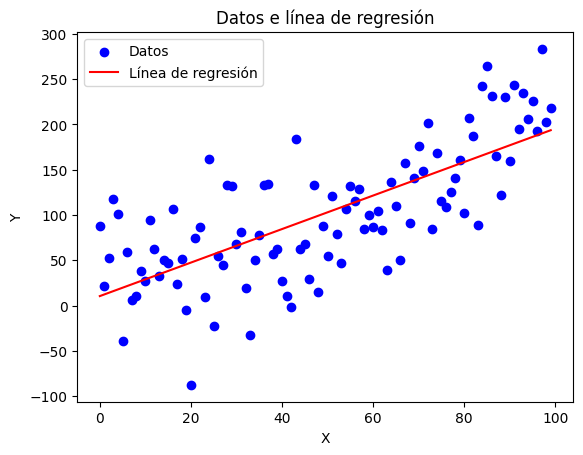

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
np.random.seed(0)
X = np.arange(0, 100)
Y = 2 * X + np.random.normal(0, 50, size=X.size)

# Crear el gráfico de dispersión
plt.scatter(X, Y, color='blue', label='Datos')

# Calcular la línea de regresión
coef = np.polyfit(X, Y, 1)
poly1d_fn = np.poly1d(coef)

# Dibujar la línea de regresión
plt.plot(X, poly1d_fn(X), color='red', label='Línea de regresión')

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos e línea de regresión')
plt.legend()

# Mostrar el gráfico
plt.show()

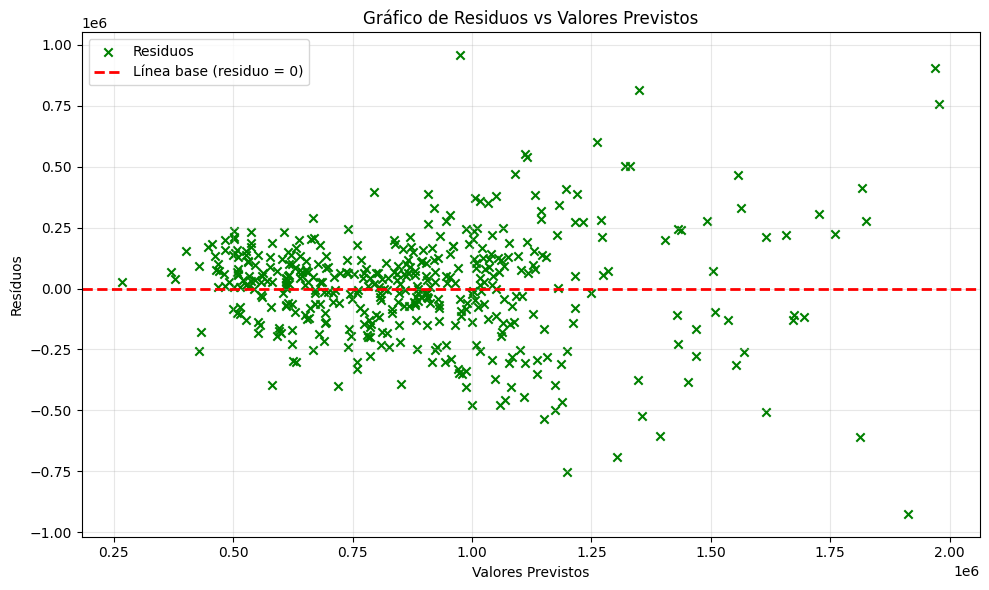

In [97]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes:
# prevision_3: predicciones del modelo
# y_test: valores reales

# Calculamos los residuos
residuos = y_test - prevision_3

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(prevision_3, residuos, color='green', marker='x', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Línea base (residuo = 0)')

# Etiquetas
plt.title('Gráfico de Residuos vs Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**<font color='green'>¿Por qué es un Problema la Heterocedasticidad?**<br>

La presencia de heterocedasticidad puede llevar a estimaciones de coeficientes ineficientes y a pruebas de hipótesis inválidas, comprometiendo la confiabilidad de las inferencias estadísticas. Aunque no afecta la imparcialidad o la consistencia de los estimadores de mínimos cuadrados ordinarios, impacta en la eficiencia de estos estimadores, haciéndolos menos confiables.

**<font color='green'>Identificando la Heterocedasticidad.** <br>

Uno de los métodos más comunes para detectar la heterocedasticidad es a través del análisis visual de los residuos. Después de ajustar un modelo de regresión lineal, podemos graficar los residuos en función de los valores previstos. Si los residuos se dispersan de manera uniforme, sin formar patrones o embudos, el modelo probablemente presenta homocedasticidad. Por otro lado, si la dispersión de los residuos aumenta o disminuye con los valores previstos, esto indica heterocedasticidad.

**<font color='green'>¿Cómo Evaluar la Heterocedasticidad?**<br>

Además de un análisis visual de los residuos, existen varias pruebas estadísticas para evaluar formalmente la presencia de heterocedasticidad, como la prueba de White y la prueba de Breusch-Pagan. Estas pruebas ayudan a cuantificar si la varianza de los residuos está relacionada con los valores previstos, proporcionando una base más sólida para decidir si la heterocedasticidad es una preocupación significativa en el modelo.

**<font color='green'>Tratando la Heterocedasticidad**<br>

Si identificamos heterocedasticidad, se pueden adoptar varias enfoques para abordar el problema, como la transformación de variables (por ejemplo, logarítmica o raíz cuadrada) o el uso de técnicas de regresión robustas, que son menos sensibles a la varianza de los residuos.

**<font color='green'>Conclusión.**<br>

Al comprender e identificar la heterocedasticidad, podemos tomar medidas apropiadas para garantizar que nuestros análisis de regresión lineal sean confiables y válidos. Este cuidado nos permite hacer inferencias más precisas y fundamentadas, esenciales para la toma de decisiones basadas en datos.